In [1]:
import numpy as np
import pandas as pd

In [2]:
columns = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',sep='\t',names=columns)

In [3]:
df.head(4)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949


In [4]:
movie_data = pd.read_csv('Movie_Id_Titles.txt')

In [5]:
movie_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df = pd.merge(df,movie_data,on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


## EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
# movie title based on average ratings

df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
# movie title based on number of ratings

df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [12]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [13]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [14]:
ratings['rating_count'] = df.groupby('title')['rating'].count()

In [15]:
ratings.head()

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [16]:
ratings.describe()

,rating,rating_count
count,1664.000000,1664.000000
mean,3.077010,60.097957
std,0.780411,80.963482
min,1.000000,1.000000
25%,2.665094,7.000000
50%,3.162132,27.000000
75%,3.651808,80.250000
max,5.000000,584.000000


Text(0.5, 1.0, 'Rating Distribution')

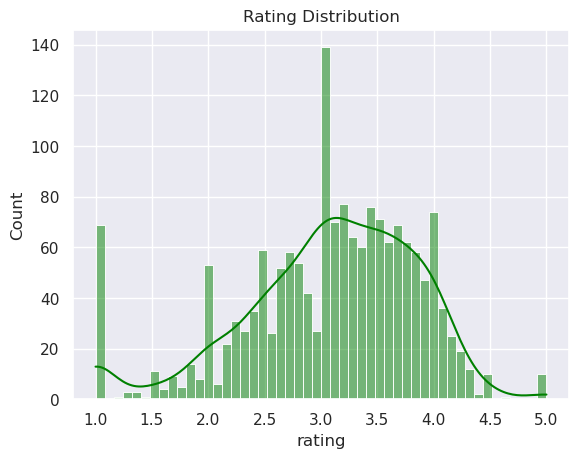

In [17]:
sns.histplot(data=ratings,x='rating',bins=50,kde=True,color='green')
plt.title('Rating Distribution')

### It symbolises a normal gaussian distribution of rating, where most of rating ranges from 3,1 to 4, having few outliers as an exception

Text(0.5, 1.0, 'Total No. of Ratings')

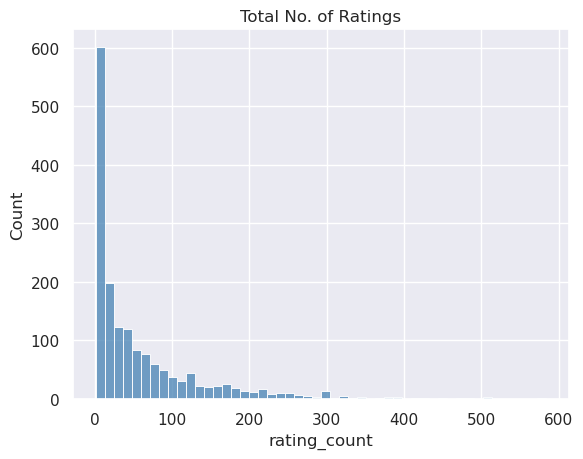

In [18]:
sns.histplot(data=ratings,x='rating_count',bins=50,color='steelblue')
plt.title('Total No. of Ratings')

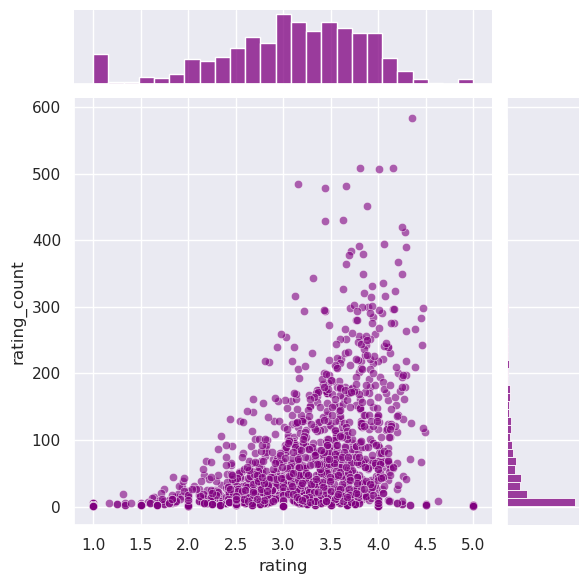

In [19]:
sns.jointplot(data=ratings,x='rating',y='rating_count',color='purple',alpha=0.6)

### Rating count is densed in range (3 to 4)

### Pivot Table

In [20]:
movie_pivot = df.pivot_table(index='user_id',values='rating',columns='title')

In [21]:
movie_pivot.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings.sort_values(ascending=False,by='rating_count').head(10)

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [23]:
fargo_rating = movie_pivot['Fargo (1996)']
toy_story_rating = movie_pivot['Toy Story (1995)']

In [24]:
fargo_rating.head(10)

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
6    5.0
7    5.0
8    NaN
9    NaN
Name: Fargo (1996), dtype: float64

In [25]:
toy_story_rating.head(10)

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
5    4.0
6    4.0
7    NaN
8    NaN
9    NaN
Name: Toy Story (1995), dtype: float64

### For Toy Story Movie

In [26]:
toy_story_corr = movie_pivot.corrwith(toy_story_rating)

/home/krishna-verma/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/krishna-verma/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [27]:
toy_story_corr.head(5)

title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

In [28]:
toy_story_df = pd.DataFrame(toy_story_corr,columns=['Correlation'])

In [29]:
toy_story_df.head(4)

,Correlation
title,
'Til There Was You (1997),0.534522
1-900 (1994),NaN
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943


In [30]:
toy_story_df.dropna(inplace=True)

In [31]:
toy_story_corr_df = toy_story_df.join(ratings.rating_count)

In [32]:
toy_story_corr_df.head(5)

,Correlation,rating_count
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [33]:
toy_story_corr_df[toy_story_corr_df.rating_count>=100].sort_values(ascending=False,by='Correlation')

,Correlation,rating_count
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
...,...,...
Raging Bull (1980),-0.083523,116
Boogie Nights (1997),-0.086194,189
"Clockwork Orange, A (1971)",-0.087710,221


### After Toy Story, Next Movie recommended by content based system is Craft, The (1996)	 with 0.54 correlation and 104 rating


### For Fargo Movie

In [34]:
fargo_rating.head(5)

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [35]:
fargo_rating_corr = movie_pivot.corrwith(fargo_rating)

/home/krishna-verma/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/krishna-verma/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [36]:
fargo_rating_corr = pd.DataFrame(fargo_rating_corr,columns=['correlation'])

In [37]:
fargo_rating_corr.head(10)

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509
2 Days in the Valley (1996),0.338319
"20,000 Leagues Under the Sea (1954)",0.270497
2001: A Space Odyssey (1968),0.299882
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [38]:
fargo_rating_corr.dropna(inplace=True)
fargo_rating_corr = fargo_rating_corr.join(ratings.rating_count)

In [39]:
fargo_rating_corr.head()

,correlation,rating_count
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [40]:
fargo_rating_corr[fargo_rating_corr.rating_count>=100].sort_values(ascending=False,by='correlation')

,correlation,rating_count
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
...,...,...
Murder at 1600 (1997),-0.164567,218
Conan the Barbarian (1981),-0.174455,107
"Peacemaker, The (1997)",-0.192570,136


### After Fargo (1996), Next Movie recommended by content based system is Sling Blade (1996) with 0.38 correlation & 136 rating
